# Problem 4

In [1]:
# Importing relevant packages and doing necessary setup
import cv2
import matplotlib.pyplot as plt
import matplotlib
import PIL
import numpy as np

%matplotlib inline
# for auto-reloading external modules
%load_ext autoreload
%autoreload 2

In [2]:
# Helper function to display multiple images in a plot
def display_images(images, rows, cols, size, title, subtitles):
    fig = plt.figure(figsize = size)
    c = 0
    sz = len(images)
    for i in range(rows):
        for j in range(cols):
            if sz == c:
                break
            ax1 = fig.add_subplot(rows, cols, c + 1)
            ax1.imshow(images[c], cmap = 'gray')
            ax1.set_title(subtitles[c], fontsize = 20)
            c = c + 1
    plt.show()
    # Un comment the below line and comment the above line to save and display
    #plt.savefig('part2.png')

### Part 1

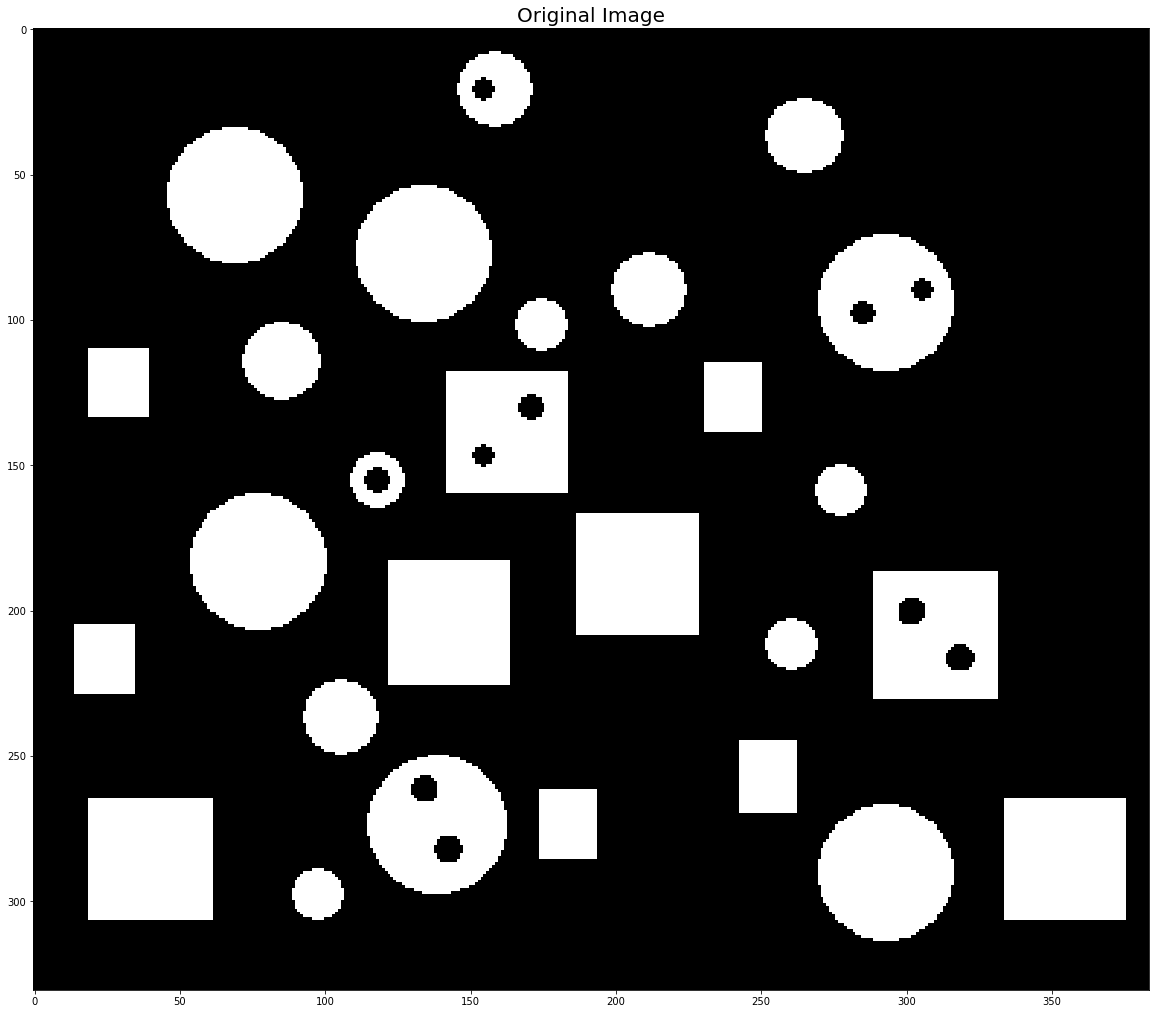

In [3]:
img = cv2.imread('../input_data/objects.png', cv2.IMREAD_GRAYSCALE)
img = (img > 127).astype(np.uint8)
images = []
subtitles = []
images.append(img)
subtitles.append('Original Image')
display_images(images, 1, 1, (20, 20), '', subtitles)

In [4]:
visited = np.zeros(img.shape)

In [5]:
def dfs(row, col, color):
    if row < 0 or col < 0 or row >= img.shape[0] or col >= img.shape[1]:
        return 0
    if img[row][col] == 0:
        return 0
    if visited[row][col] != 0:
        return 0
    visited[row][col] = color
    return (1 + dfs(row + 1, col, color) + dfs(row - 1, col, color) + dfs(row, col + 1, color) + dfs(row, col - 1, color) + dfs(row + 1, col + 1, color) + dfs(row + 1, col - 1, color) + dfs(row - 1, col + 1, color) + dfs(row - 1, col - 1, color))

In [6]:
c = 1
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if visited[i][j] == 0 and img[i][j] == 1:
            dfs(i, j, c)
            c = c + 1
print(c)

28


In [7]:
def hasHole(t):
    def dfs2(row, col, color):
        if row < 0 or col < 0 or row >= img.shape[0] or col >= img.shape[1]:
            return 0
        if test_img[row][col] == 0:
            return 0
        if visited2[row][col] != 0:
            return 0
        visited2[row][col] = color
        return (1 + dfs2(row + 1, col, color) + dfs2(row - 1, col, color) + dfs2(row, col + 1, color) + dfs2(row, col - 1, color) + dfs2(row + 1, col + 1, color) + dfs2(row + 1, col - 1, color) + dfs2(row - 1, col + 1, color) + dfs2(row - 1, col - 1, color))
    output = np.zeros(img.shape)
    visited2 = np.zeros(img.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if visited[i][j] == t:
                output[i][j] = 1
    eimg = cv2.dilate(output, cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5)), iterations = 2)
    eimg = cv2.erode(eimg, cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5)), iterations = 2)
    test_img = abs(output - eimg)

    count = 0
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if visited2[i][j] == 0 and test_img[i][j] == 1:
                dfs2(i, j, 1)
                count += 1
    if count >= 1:
        return True
    return False

In [8]:
res = 0
for i in range(c - 1):
    if hasHole(i + 1) == True:
        res = res + 1
print("Number of objects with one or more holes = ", str(res)) 

Number of objects with one or more holes =  6


### Part 2

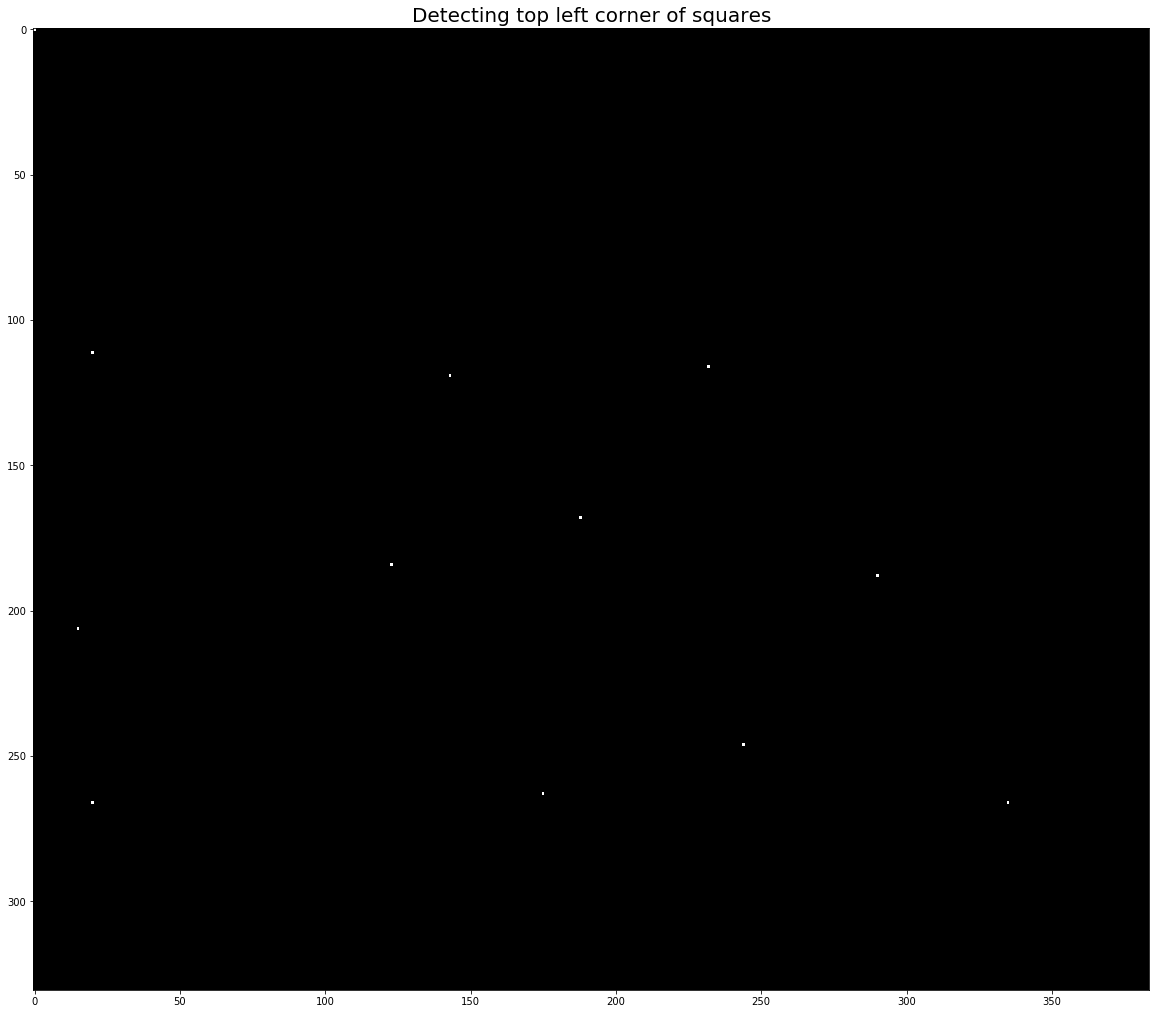

In [20]:
img = cv2.imread('../input_data/objects.png', cv2.IMREAD_GRAYSCALE)
img = (img > 127).astype(np.uint8)
kernel = np.zeros((4,4),np.uint8)
for i in range(1, 4):
    kernel[1][i] = 1
    kernel[i][1] = 1

eimg = cv2.erode(img, kernel, iterations = 1)

img = cv2.erode(abs(eimg - img), kernel, iterations = 1)

img = (img > 127).astype(np.uint8)
images = []
subtitles = []
images.append(img)
subtitles.append('Detecting top left corner of squares')
display_images(images, 1, 1, (20, 20), '', subtitles)

In [10]:
visited = np.zeros(img.shape)

In [11]:
def dfs(row, col, color):
    if row < 0 or col < 0 or row >= img.shape[0] or col >= img.shape[1]:
        return 0
    if img[row][col] == 0:
        return 0
    if visited[row][col] != 0:
        return 0
    visited[row][col] = color
    return (1 + dfs(row + 1, col, color) + dfs(row - 1, col, color) + dfs(row, col + 1, color) + dfs(row, col - 1, color) + dfs(row + 1, col + 1, color) + dfs(row + 1, col - 1, color) + dfs(row - 1, col + 1, color) + dfs(row - 1, col - 1, color))

In [12]:
c = 0
for i in range(1, img.shape[0]):
    for j in range(1, img.shape[1]):
        if img[i][j] == 1 and visited[i][j] == 0:
            dfs(i, j, 1)
            #print(str(i) + " " + str(j))
            c = c + 1
print("Number of square objects in the image = ", c)
next_part = visited

Number of square objects in the image =  11


### Part 3

In [13]:
img = cv2.imread('../input_data/objects.png', cv2.IMREAD_GRAYSCALE)
img = (img > 127).astype(np.uint8)


In [14]:
visited = np.zeros(img.shape)

In [15]:
def dfs(row, col, color):
    if row < 0 or col < 0 or row >= img.shape[0] or col >= img.shape[1]:
        return 0
    if img[row][col] == 0:
        return 0
    if visited[row][col] != 0:
        return 0
    visited[row][col] = color
    return (1 + dfs(row + 1, col, color) + dfs(row - 1, col, color) + dfs(row, col + 1, color) + dfs(row, col - 1, color) + dfs(row + 1, col + 1, color) + dfs(row + 1, col - 1, color) + dfs(row - 1, col + 1, color) + dfs(row - 1, col - 1, color))

In [16]:
c = 0
for i in range(1, img.shape[0]):
    for j in range(1, img.shape[1]):
        if next_part[i][j] == 1 and visited[i][j] == 0:
            dfs(i, j, c + 1)
            #print(str(i) + " " + str(j))
            c = c + 1
print("Number of square objects in the image = ", c)

Number of square objects in the image =  11


Number of Square Objects with holes =  2


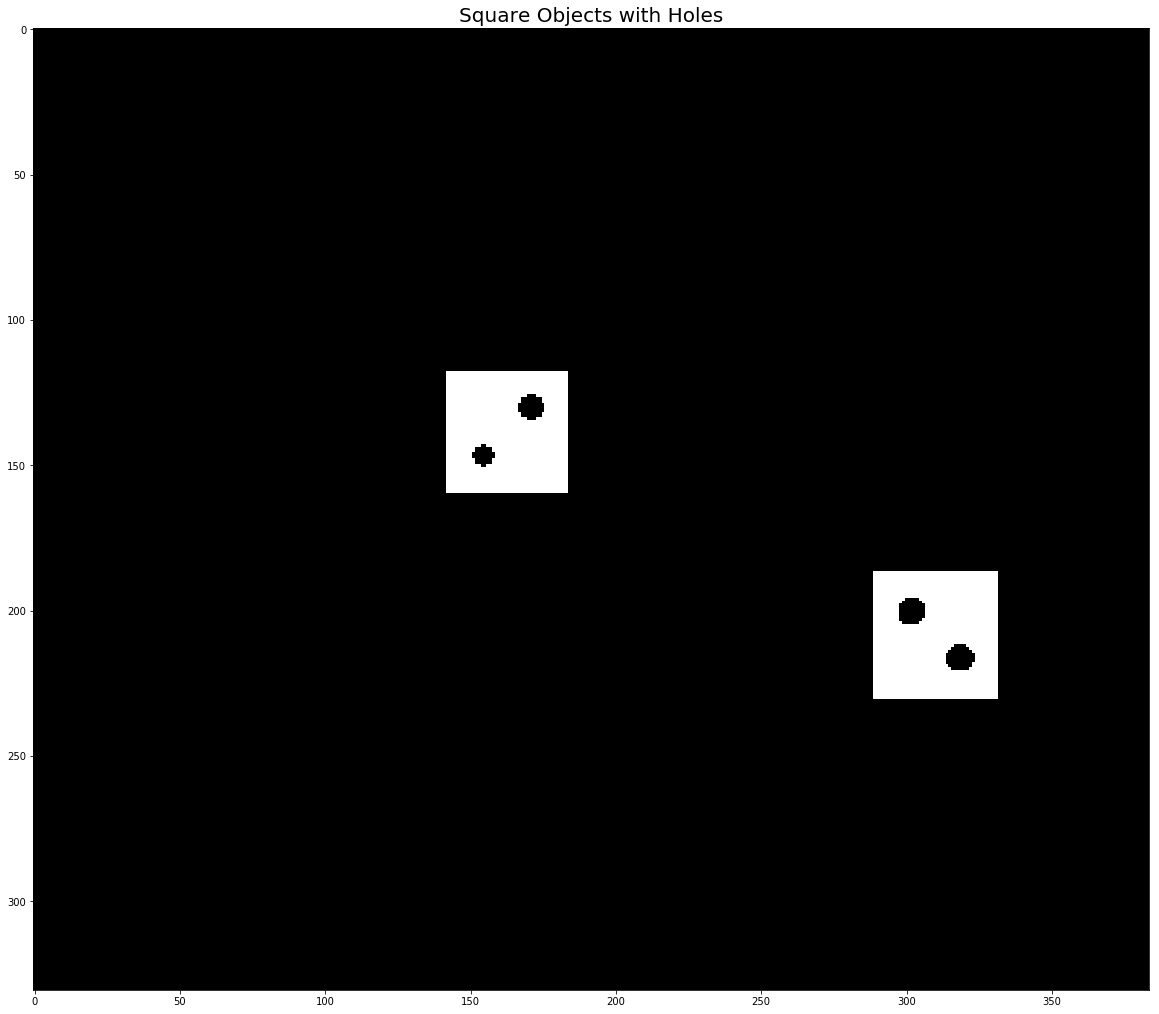

In [17]:
res = 0
OUTPUT = np.zeros(img.shape)
next_part = np.zeros(img.shape)
for i in range(c):
    if (hasHole(i + 1)) == True:
        res += 1
        for j in range(img.shape[0]):
            for k in range(img.shape[1]):
                if visited[j][k] == (i + 1):
                    OUTPUT[j][k] = 1
for j in range(img.shape[0]):
    for k in range(img.shape[1]):
        if visited[j][k] > 0:
            next_part[j][k] = 1
print("Number of Square Objects with holes = ", res)
images = []
subtitles = []
images.append(OUTPUT)
subtitles.append('Square Objects with Holes')
display_images(images, 1, 1, (20, 20), '', subtitles)

### Part 4

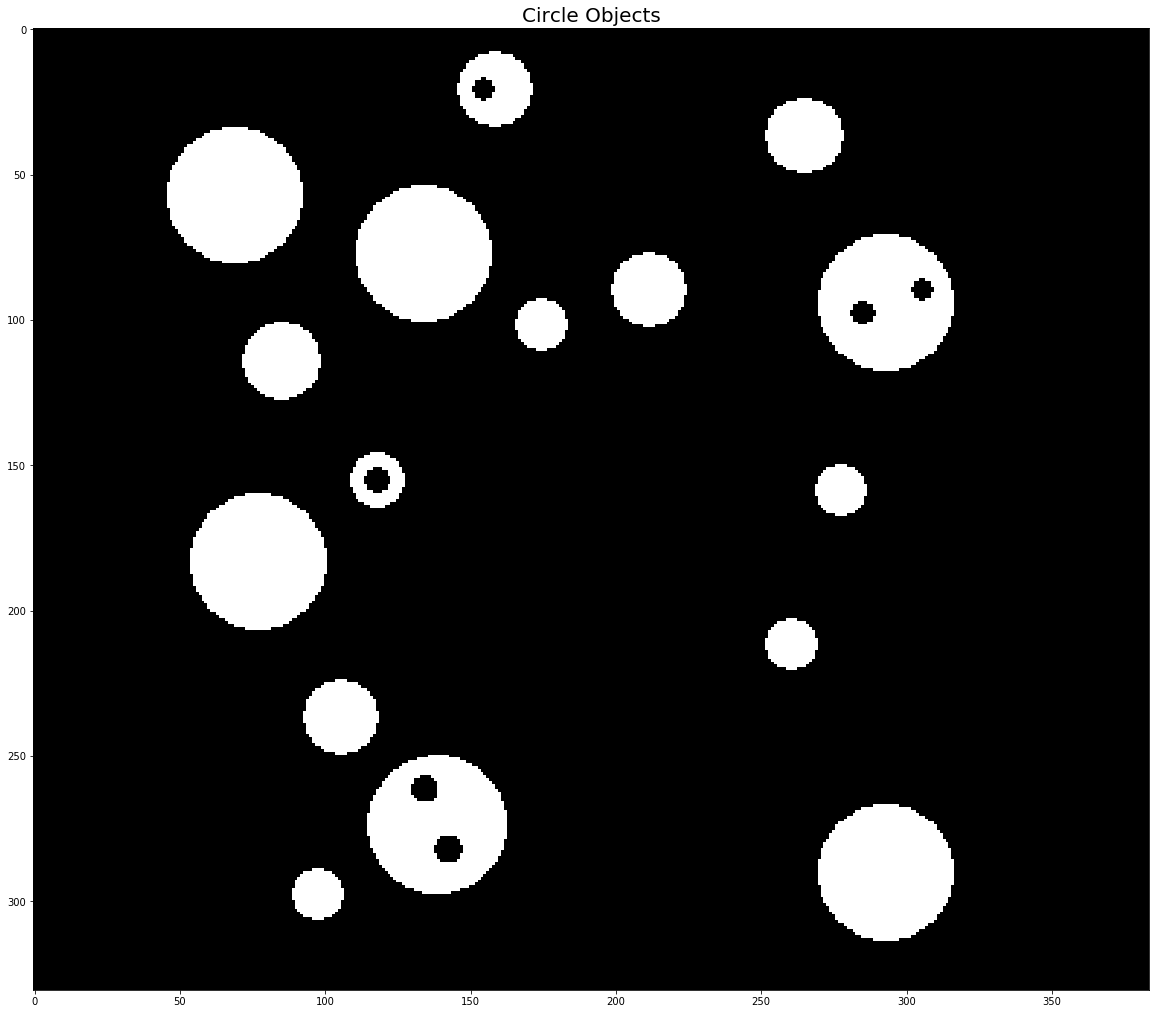

In [18]:
img = abs(next_part - img)
images = []
subtitles = []
images.append(img)
subtitles.append('Circle Objects')
display_images(images, 1, 1, (20, 20), '', subtitles)

In [19]:
visited = np.zeros(img.shape)

In [20]:
def dfs(row, col, color):
    if row < 0 or col < 0 or row >= img.shape[0] or col >= img.shape[1]:
        return 0
    if img[row][col] == 0:
        return 0
    if visited[row][col] != 0:
        return 0
    visited[row][col] = color
    return (1 + dfs(row + 1, col, color) + dfs(row - 1, col, color) + dfs(row, col + 1, color) + dfs(row, col - 1, color) + dfs(row + 1, col + 1, color) + dfs(row + 1, col - 1, color) + dfs(row - 1, col + 1, color) + dfs(row - 1, col - 1, color))

In [21]:
c = 0
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if visited[i][j] == 0 and img[i][j] == 1:
            dfs(i, j, c + 1)
            c += 1
print(c)

16


Number of Circular Objects that have no holes =  12


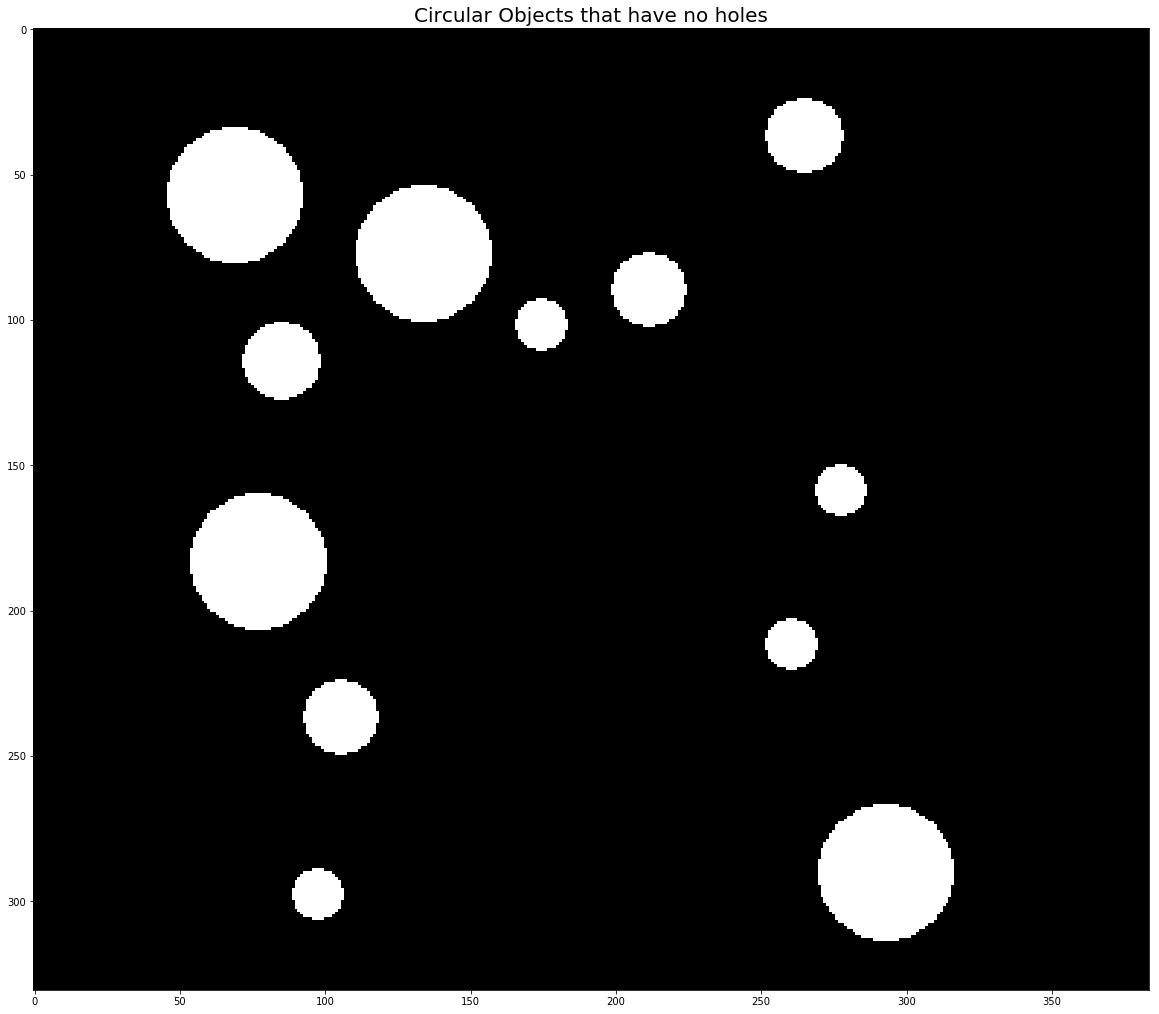

In [22]:
OUTPUT = np.zeros(img.shape)
res = 0
for i in range(c):
    if hasHole(i + 1) == False:
        res = res + 1
        for j in range(img.shape[0]):
            for k in range(img.shape[1]):
                if visited[j][k] == (i + 1):
                    OUTPUT[j][k] = 1
print("Number of Circular Objects that have no holes = ", res)
images = []
subtitles = []
images.append(OUTPUT)
subtitles.append('Circular Objects that have no holes')
display_images(images, 1, 1, (20, 20), '', subtitles)